In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, chi2,f_classif
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [26]:
df = pd.read_csv('Train.csv', sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
df.fillna(df.mean(), inplace=True)
df = df.set_index('Employee_ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, EID_23371 to EID_1640
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        7000 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            7000 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  7000 non-null   float64
 13  Compensation_and_Benefits  7000 non-null 

#### Group according to Data Type

In [27]:
df = pd.get_dummies(df, drop_first=True)

In [28]:
print(df.shape)
df.head()

(7000, 41)


,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,0,0,0,0,1,0,0,1,0,0
EID_18000,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,0,0,0,0,0,0,0,1,0,0
EID_3891,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,0,0,0,0,1,0,0,1,0,0
EID_17492,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,0,0,0,1,0,0,0,1,0,0
EID_22534,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,0,0,0,0,1,0,0,0,1,0


In [29]:
target = df['Attrition_rate'].copy()
target

Employee_ID
EID_23371    0.1841
EID_18000    0.0670
EID_3891     0.0851
EID_17492    0.0668
EID_22534    0.1827
              ...  
EID_16328    0.7839
EID_8387     0.1055
EID_8077     0.7847
EID_19597    0.4162
EID_1640     0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [30]:
target = 'Attrition_rate'
X = df.loc[:, df.columns != target]
y = df.loc[:, df.columns == target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=8)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4690, 40)
Number transactions y_train dataset:  (4690, 1)
Number transactions X_test dataset:  (2310, 40)
Number transactions y_test dataset:  (2310, 1)


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, EID_23371 to EID_1640
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7000 non-null   float64
 1   Education_Level                    7000 non-null   int64  
 2   Time_of_service                    7000 non-null   float64
 3   Time_since_promotion               7000 non-null   int64  
 4   growth_rate                        7000 non-null   int64  
 5   Travel_Rate                        7000 non-null   int64  
 6   Post_Level                         7000 non-null   int64  
 7   Pay_Scale                          7000 non-null   float64
 8   Work_Life_balance                  7000 non-null   float64
 9   VAR1                               7000 non-null   int64  
 10  VAR2                               7000 non-null   float64
 11  VAR3                               7000 non-null 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, EID_23371 to EID_1640
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7000 non-null   float64
 1   Education_Level                    7000 non-null   int64  
 2   Time_of_service                    7000 non-null   float64
 3   Time_since_promotion               7000 non-null   int64  
 4   growth_rate                        7000 non-null   int64  
 5   Travel_Rate                        7000 non-null   int64  
 6   Post_Level                         7000 non-null   int64  
 7   Pay_Scale                          7000 non-null   float64
 8   Work_Life_balance                  7000 non-null   float64
 9   VAR1                               7000 non-null   int64  
 10  VAR2                               7000 non-null   float64
 11  VAR3                               7000 non-null 

In [33]:
CnB = df[["Attrition_rate","Compensation_and_Benefits_type1","Compensation_and_Benefits_type2","Compensation_and_Benefits_type3",
          "Compensation_and_Benefits_type4"]]
decision = df[["Attrition_rate","Decision_skill_possess_Behavioral","Decision_skill_possess_Conceptual",
               "Decision_skill_possess_Directive"]]
unit = df[["Attrition_rate","Unit_Human Resource Management","Unit_IT","Unit_Logistics","Unit_Marketing",
           "Unit_Operarions","Unit_Production","Unit_Purchasing","Unit_Quality","Unit_R&D","Unit_Sales",
           "Unit_Security"]]
other = df[["Attrition_rate","Age","Education_Level","Time_of_service","Time_since_promotion","growth_rate","Travel_Rate","Post_Level",
          "Pay_Scale","Work_Life_balance"]]
variable = df[["Attrition_rate","VAR1","VAR2","VAR3","VAR4","VAR5",
          "VAR6","VAR7"]]

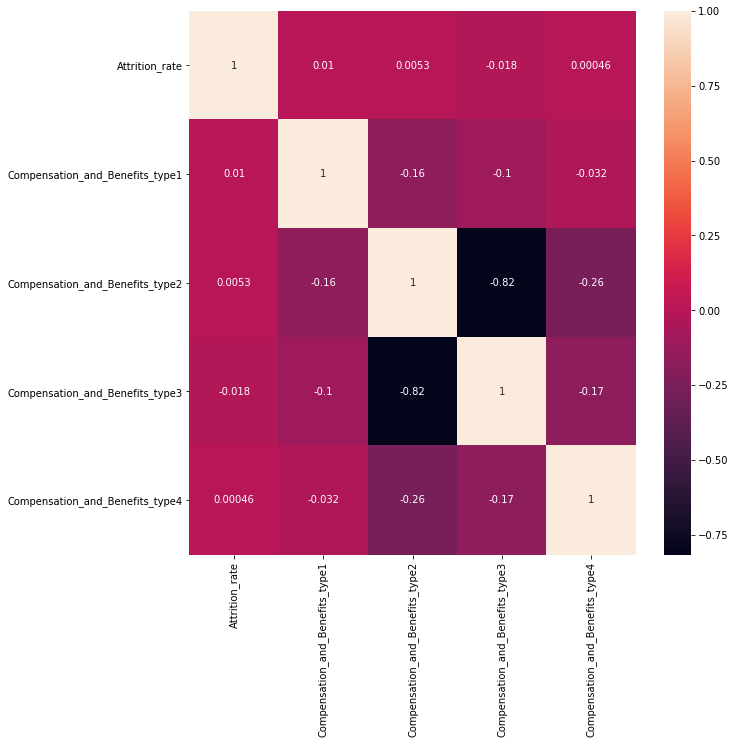

In [34]:
plt.figure(figsize = (10, 10))
sns.heatmap(CnB.corr(), annot = True)

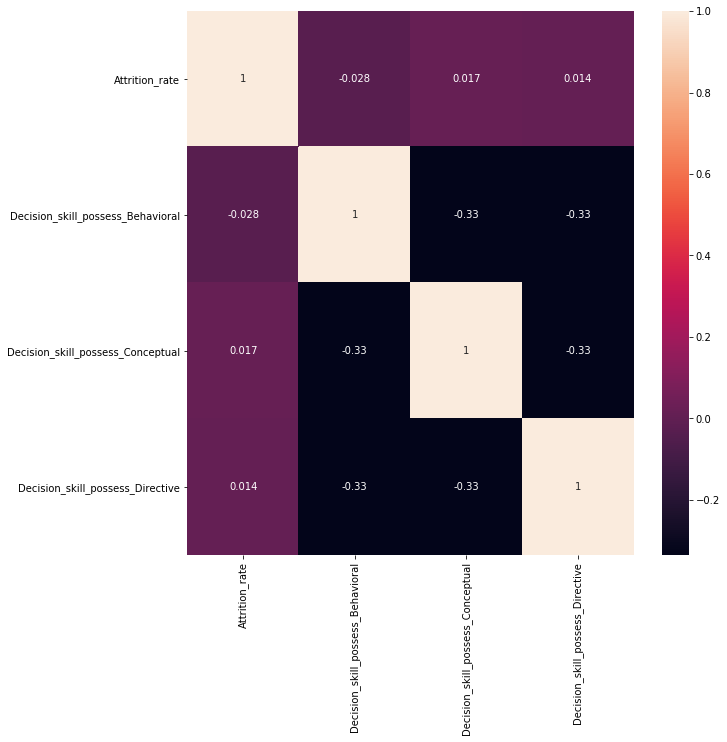

In [35]:
plt.figure(figsize = (10, 10))
sns.heatmap(decision.corr(), annot = True)

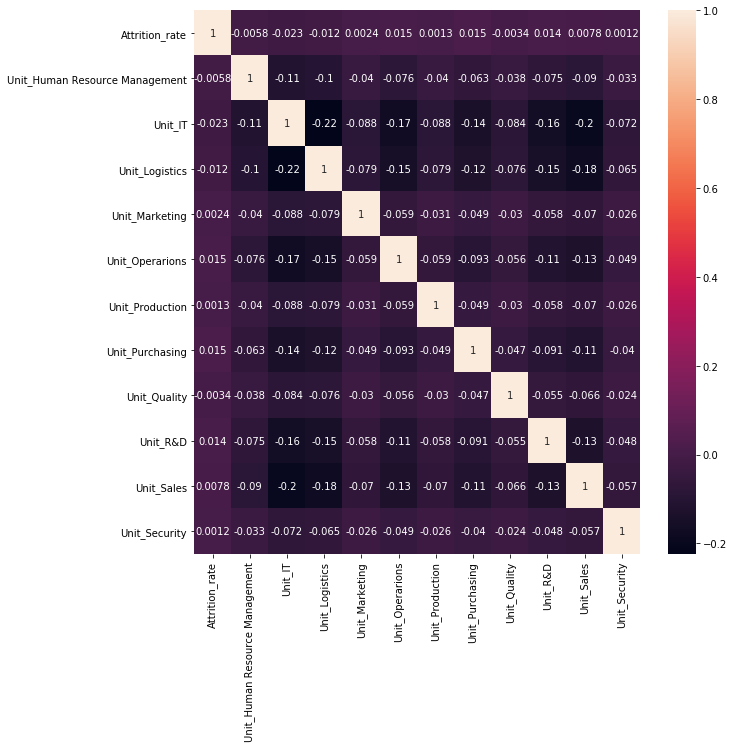

In [36]:
plt.figure(figsize = (10, 10))
sns.heatmap(unit.corr(), annot = True)

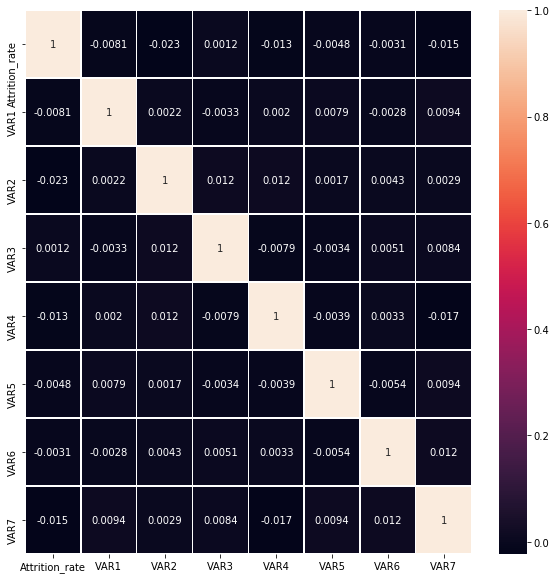

In [37]:
plt.figure(figsize = (10, 10))
sns.heatmap(variable.corr(), annot = True, linewidths=.5)

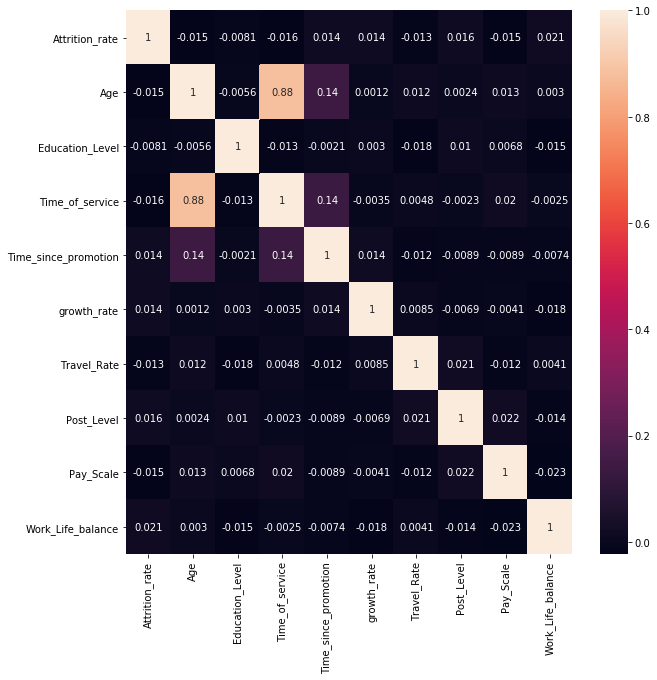

In [38]:
plt.figure(figsize = (10, 10))
sns.heatmap(other.corr(), annot = True)

# Feature Selection

In [62]:
selector = SelectKBest(f_classif, k = 23)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X_train, y_train.values.ravel())
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'ANOVA F_Value'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['ANOVA F_Value', 'Feat_names'], ascending = [False, True])
ns_df_sorted

,Feat_names,ANOVA F_Value
15,Unit_Purchasing,1.202312
12,Hometown_Springfield,1.094088
19,Unit_Security,1.090436
5,VAR1,1.045546
13,Unit_IT,1.042435
6,VAR3,1.033845
8,Gender_M,1.032933
10,Hometown_Franklin,1.029504
20,Decision_skill_possess_Conceptual,1.028264
21,Decision_skill_possess_Directive,1.026985


In [63]:
feature = df['Age']
for i in ns_df_sorted['Feat_names']:
    feature = pd.concat([feature,df[i]],axis=1)
feature.shape

(7000, 24)

# Model Declaration  

In [64]:
#regressor = RandomForestRegressor(n_estimators=20, n_jobs = -1,random_state = 15,max_features = "auto")
regressor = LinearRegression()
regressor.fit(X_train[feature.columns], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
model = regressor.fit(X_train[feature.columns], y_train.values.ravel())
y_predict = model.predict(X_test[feature.columns])
y_predict

array([0.18682696, 0.18171165, 0.19013505, ..., 0.21355303, 0.17751306,
       0.20534631])

In [66]:
y_reshape = y_predict.reshape(2310,1)
y_reshape.shape

(2310, 1)

In [67]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 1000)
regressor_lasso.fit(X_train[feature.columns],y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict = regressor_lasso.predict( X_test[feature.columns])
y_predict

Linear Model Coefficient (m):  [-0.  0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0. -0.  0.
 -0.  0. -0.  0. -0. -0.]
Linear Model Coefficient (b):  [0.18878955]


array([0.18878955, 0.18878955, 0.18878955, ..., 0.18878955, 0.18878955,
       0.18878955])

In [68]:
r2_score(y_test, y_predict)

-8.852636780232181e-05

In [69]:
df_test = pd.read_csv('Test.csv')
df_test = df_test.set_index('Employee_ID')
df_test = pd.get_dummies(df_test, drop_first=True)
df_test.fillna(0, inplace=True)
df_temp = df_test[feature.columns]


In [70]:
y_predicted = regressor_lasso.predict(df_temp)
Yhat=pd.DataFrame(y_predicted,columns=['Attrition_rate'])

In [71]:
var =pd.DataFrame(df_test.index)
df_col = pd.concat([var,Yhat], axis=1)
df_col.to_csv("Prediction.csv",index=False)